In [1]:
#importing packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/big-mart-sales/Test-Set.csv
/kaggle/input/big-mart-sales/Train-Set.csv


In [2]:
df = pd.read_csv("/kaggle/input/big-mart-sales/Train-Set.csv")

## Getting the overview

In [3]:
# getting the first 5 rows

df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# shape of the data

df.shape

(8523, 12)

In [5]:
# getting the overview 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 'OutletType']
Numerical Columns: ['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSales']


In [8]:
# checking duplicate values

df.duplicated().sum()

0

In [9]:
# getting the percentage of null data

df.isnull().mean()*100

ProductID             0.000000
Weight               17.165317
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.276428
LocationType          0.000000
OutletType            0.000000
OutletSales           0.000000
dtype: float64

## Handeling the null values

In [10]:
# weight is numerical so we can checking its mean

df['Weight'].mean()

12.857645184135976

In [11]:
# filling the missing weight column with mean value

df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [12]:
# getting the outlet size categories

df["OutletSize"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
# as the outlet size is category , getting the mode of the outlet size

df['OutletSize'].mode()

0    Medium
Name: OutletSize, dtype: object

In [14]:
# filling the missing outletsize column with mode value

df['OutletSize'] = df['OutletSize'].fillna(df['OutletSize'].mode()[0])

In [15]:
# checking if the nulls are updated

df.isnull().mean()*100

ProductID            0.0
Weight               0.0
FatContent           0.0
ProductVisibility    0.0
ProductType          0.0
MRP                  0.0
OutletID             0.0
EstablishmentYear    0.0
OutletSize           0.0
LocationType         0.0
OutletType           0.0
OutletSales          0.0
dtype: float64

## Handeling the outliers

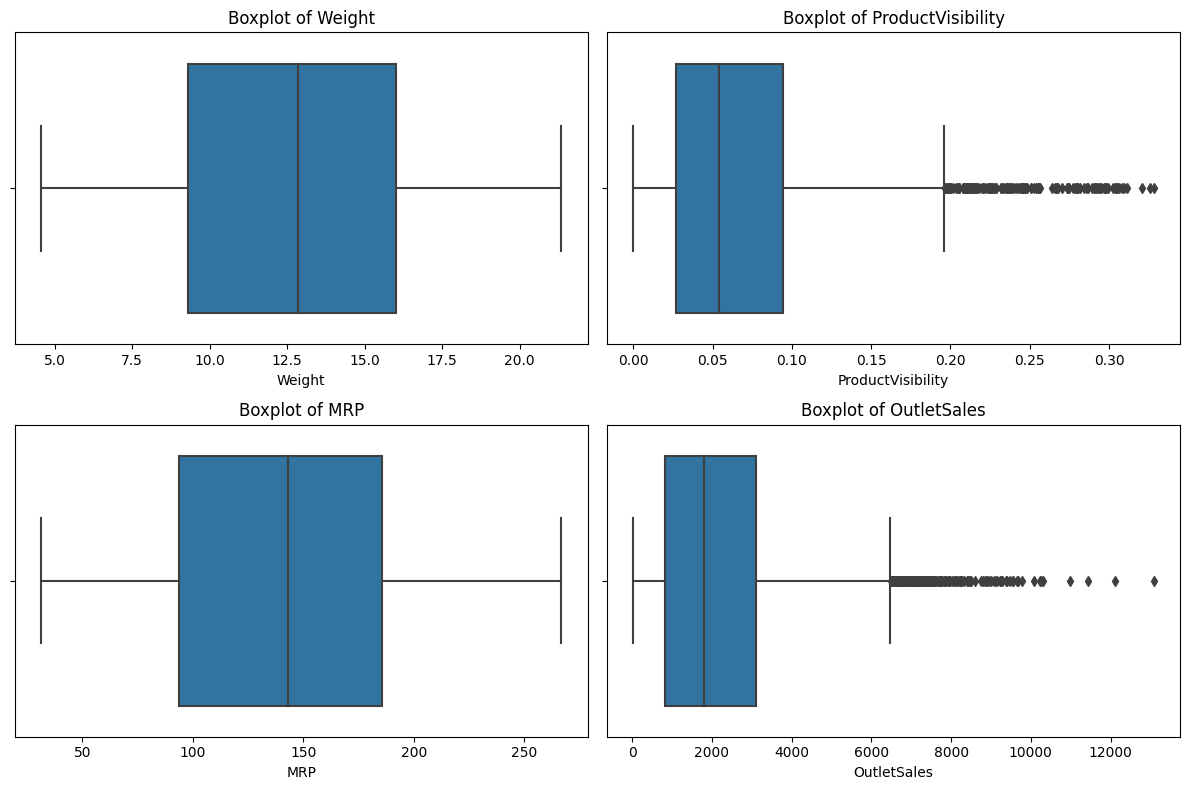

In [16]:
# checking for outliers

# List of numeric columns to visualize
numeric_cols = ['Weight', 'ProductVisibility', 'MRP', 'OutletSales']

# Plotting boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 subplot grid
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

### OutletSales outliers 

In [17]:
df['OutletSales'].skew()

1.1775306028542796

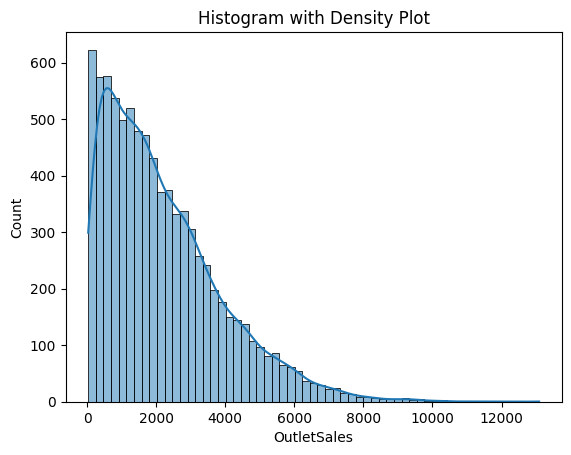

In [18]:
# Histogram and density plot
sns.histplot(df['OutletSales'], kde=True)
plt.title('Histogram with Density Plot')
plt.show()

In [19]:
# as the data is right skewed we are going to use iqr method to remove outliers

outletsales_Q1 = df['OutletSales'].quantile(0.25)  # 1st Quartile (25th percentile)
outletsales_Q3 = df['OutletSales'].quantile(0.75)  # 3rd Quartile (75th percentile)
outletsales_IQR = outletsales_Q3 - outletsales_Q1                     # Interquartile Range

print(f"Q1: {outletsales_Q1}, Q3: {outletsales_Q3}, IQR: {outletsales_IQR}")

Q1: 834.2474, Q3: 3101.2964, IQR: 2267.049


In [20]:
outletsales_upper_limit = outletsales_Q3 + 1.5*outletsales_IQR 
outletsales_lower_limit = outletsales_Q1 - 1.5*outletsales_IQR

print(f"Upper limit = {outletsales_upper_limit}")
print(f"Lower limit = {outletsales_lower_limit}")

Upper limit = 6501.8699
Lower limit = -2566.3261


In [21]:
df[df["OutletSales"]>outletsales_upper_limit]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
43,FDC02,21.350000,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.857645,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.857645,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.600000,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,12.857645,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.200000,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,12.857645,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.000000,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.350000,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Medium,Tier 2,Supermarket Type1,7588.1226


In [22]:
df[df["OutletSales"]<outletsales_lower_limit] #No data lower limit as the lower_limit value is in negative

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales


In [23]:
# as the dataset is less and sales data is meaningfull so we will use capping method

df["OutletSales"] = np.where(
    df["OutletSales"] > outletsales_upper_limit , outletsales_upper_limit ,
    np.where(df["OutletSales"]< outletsales_lower_limit , outletsales_lower_limit,df["OutletSales"])
)

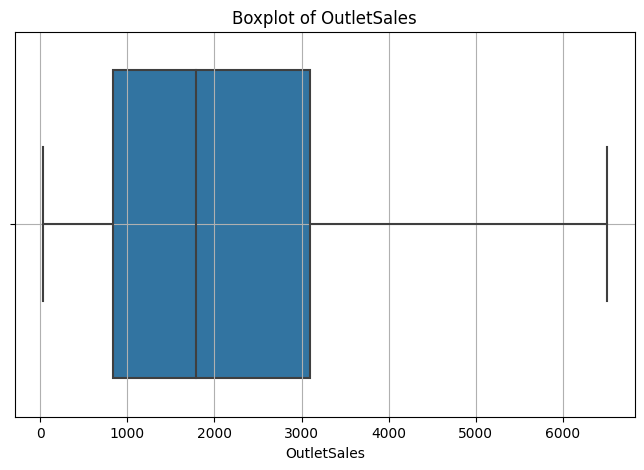

In [24]:
# checking if outliers are removed

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["OutletSales"])
plt.title("Boxplot of OutletSales")
plt.xlabel("OutletSales")
plt.grid(True)
plt.show()

### ProductVisibility outliers

In [25]:
df["ProductVisibility"].skew()

1.1670905496918396

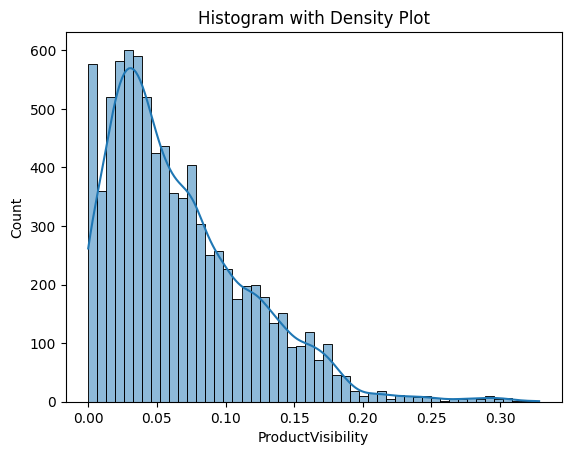

In [26]:
# Histogram and density plot
sns.histplot(df['ProductVisibility'], kde=True)
plt.title('Histogram with Density Plot')
plt.show()

In [27]:
# as the data is right skewed we are going to use iqr method to remove outliers

productvisibility_Q1 = df['ProductVisibility'].quantile(0.25)  # 1st Quartile (25th percentile)
productvisibility_Q3 = df['ProductVisibility'].quantile(0.75)  # 3rd Quartile (75th percentile)
productvisibility_IQR = productvisibility_Q3 - productvisibility_Q1                     # Interquartile Range

print(f"Q1: {productvisibility_Q1}, Q3: {productvisibility_Q3}, IQR: {productvisibility_IQR}")

Q1: 0.0269894775, Q3: 0.0945852925, IQR: 0.067595815


In [28]:
productvisibility_upper_limit = productvisibility_Q3 + 1.5*productvisibility_IQR 
productvisibility_lower_limit = productvisibility_Q1 - 1.5*productvisibility_IQR

print(f"Upper limit = {productvisibility_upper_limit}")
print(f"Lower limit = {productvisibility_lower_limit}")

Upper limit = 0.195979015
Lower limit = -0.07440424500000001


In [29]:
df[df["ProductVisibility"]>productvisibility_upper_limit]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
49,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,12.857645,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,12.857645,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.700000,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
334,FDC41,12.857645,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,12.857645,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
8345,FDY28,12.857645,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8371,DRA59,8.270000,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
8432,FDI16,14.000000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


In [30]:
df[df["ProductVisibility"]<outletsales_lower_limit]

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales


In [31]:
# as the dataset is less and sales data is meaningfull so we will use capping method

df["ProductVisibility"] = np.where(
    df["ProductVisibility"] > productvisibility_upper_limit , productvisibility_upper_limit ,
    np.where(df["ProductVisibility"]< productvisibility_lower_limit , productvisibility_lower_limit,df["ProductVisibility"])
)

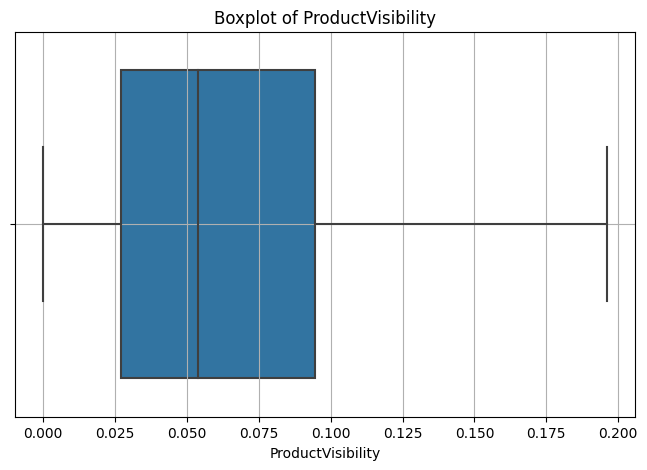

In [32]:
# checking if outliers are removed

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["ProductVisibility"])
plt.title("Boxplot of ProductVisibility")
plt.xlabel("ProductVisibility")
plt.grid(True)
plt.show()

## Data Visualisation

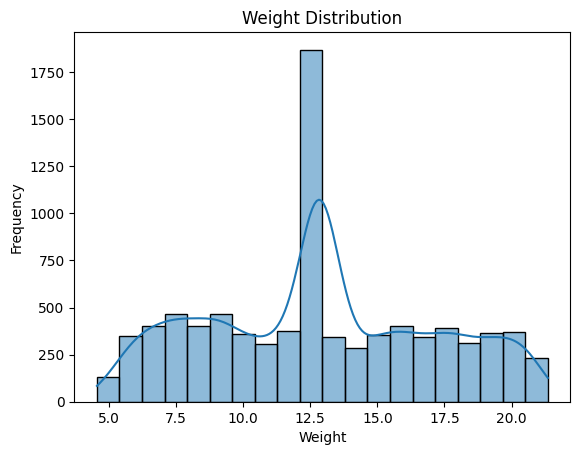

In [33]:
sns.histplot(data=df, x='Weight', bins=20, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [34]:
skewness_value = skew(df['Weight'])
print(f"Skewness: {skewness_value}")

Skewness: 0.09054551283291795


As there is no skewness, we dont need to transform the data

In [35]:
df['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
df['FatContent'] = df['FatContent'].replace({
    'reg': 'Regular',  # Replace 'reg' with 'Regular'
    'LF': 'Low Fat',   # Replace 'LF' with 'Low Fat'
    'low fat': 'Low Fat'  # Replace 'low fat' with 'Low Fat'
})

df['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

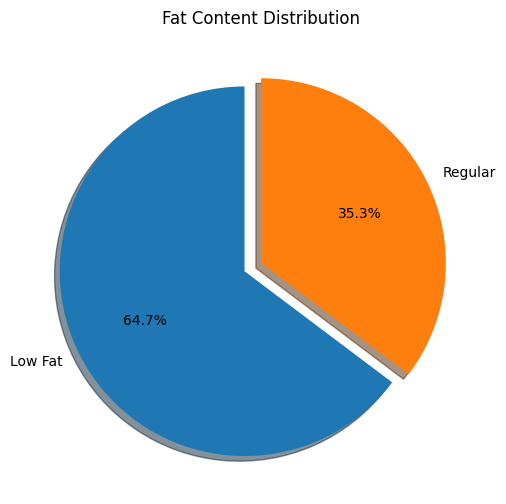

In [37]:
# Get value counts for the 'FatContent' column
fat_content_counts = df['FatContent'].value_counts()

# Prepare data for pie chart
y = fat_content_counts
mylabels = fat_content_counts.index
myexplode = (0.1, 0)  # Explode the first slice (e.g., 'Low Fat')

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(y, labels=mylabels, explode=myexplode, shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Fat Content Distribution')
plt.show()